I am importing the below mentioned libraries that will be used throughout this project.
Pandas: For data manipulation and analysis.
Numpy: For scientific computing in Python.
Random: This provides functions for generating random numbers
Requests: HTTP library for making HTTP requests in Python.
Dataclasses: Provides a decorator and functions for automatically adding special methods such as __init__() and __repr__()
CSV: Provides classes to read and write tabular data in CSV format
Matplotlib: Used for creating static, animated, and interactive visualizations in Python

In [42]:
import pandas as pd
import numpy as np
import random
import requests
from dataclasses import dataclass
import csv
import pandas as pd
import matplotlib.pyplot as plt


I will define 'get_lang_long' function which will retrieve latitude and longitude coordinates for a given city, state, and country using the OpenWeatherMap API. It sends a request with the provided parameters to the API endpoint and parses the JSON response to extract the coordinates, returning them as floats. This function is useful for obtaining geographical data for location-based applications such as weather forecasting or mapping.








In [43]:
#Testing the API to see what results we get when we run the url using API
def get_lang_long(city_name, state_code, country_code, API_key):
  response = requests.get(f'http://api.openweathermap.org/geo/1.0/direct?q={city_name},{state_code},{country_code}&appid={API_key}').json()
  data = response[0]
  print(response)
  lat, lon =data.get('lat'), data.get('lon')
  return lat,lon

Here I have defined the 'fetch_raw_api_data' function which retrieves weather data from the OpenWeatherMap API key. It sends a GET request to the API endpoint, recieves a JSON response, and prints it.

In [44]:
#Fetching the uncleaned data from the API

def fetch_raw_api_data(lat,lon,api_key):
  response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric').json()
  print(response)

city_name="Dublin"
state_name="Leinster"
country_name="Ireland"
api_key= "b201909f617b3bb4e33efe23bade4975"

The below code will fetch the weather data for a designated city by levaraging its cordinates and an API key. It acquires the cordinates with the 'get_lang_long' fn and proceeds to obtain the raw weather data using 'fetch_raw_api_data'.

In [45]:
if __name__=="__main__":
  lat,lon= get_lang_long(city_name,state_name,country_name,api_key)

  print(fetch_raw_api_data(lat,lon,api_key))

[{'name': 'Dublin', 'local_names': {'sr': 'Даблин', 'av': 'Дублин', 'hu': 'Dublin', 'os': 'Дублин', 'et': 'Dublin', 'ko': '더블린', 'vo': 'Baile Átha Cliath', 'gv': 'Divlyn', 'ro': 'Dublin', 'fo': 'Dublin', 'sh': 'Dublin', 'gd': 'Baile Àtha Cliath', 'sk': 'Dublin', 'tg': 'Дублин', 'wo': 'Dublin', 'ca': 'Dublín', 'pa': 'ਡਬਲਿਨ', 'oc': 'Dublin', 'cu': 'Доублинъ', 'is': 'Dyflinn', 'bn': 'ডাবলিন', 'sl': 'Dublin', 'ee': 'Dublin', 'wa': 'Dublin', 'sn': 'Dublin', 'zh': '都柏林', 'fy': 'Dublin', 'ps': 'ډبلن', 'fi': 'Dublin', 'rm': 'Dublin', 'fa': 'دوبلین', 'gl': 'Dublín - Baile Átha Cliath', 'sq': 'Dublini', 'pl': 'Dublin', 'id': 'Dublin', 'uz': 'Dublin', 'te': 'డబ్లిన్', 'sv': 'Dublin', 'qu': 'Baile Átha Cliath', 'ug': 'دۇبلىن', 'or': 'ଡବଲିନ', 'rw': 'Dublin', 'fr': 'Dublin', 'uk': 'Дублін', 'th': 'ดับลิน', 'lb': 'Dublin', 'ml': 'ഡബ്ലിൻ', 'yo': 'Dublin', 'bo': 'དུབ་ལིན།', 'el': 'Δουβλίνο', 'cs': 'Dublin', 'ky': 'Дублин', 'da': 'Dublin', 'nv': 'Tóhodiłhił', 'hr': 'Dublin', 'mi': 'Tapurini', 'la': 'Ebl

Here is the output that I got while running the above code in my VS Code

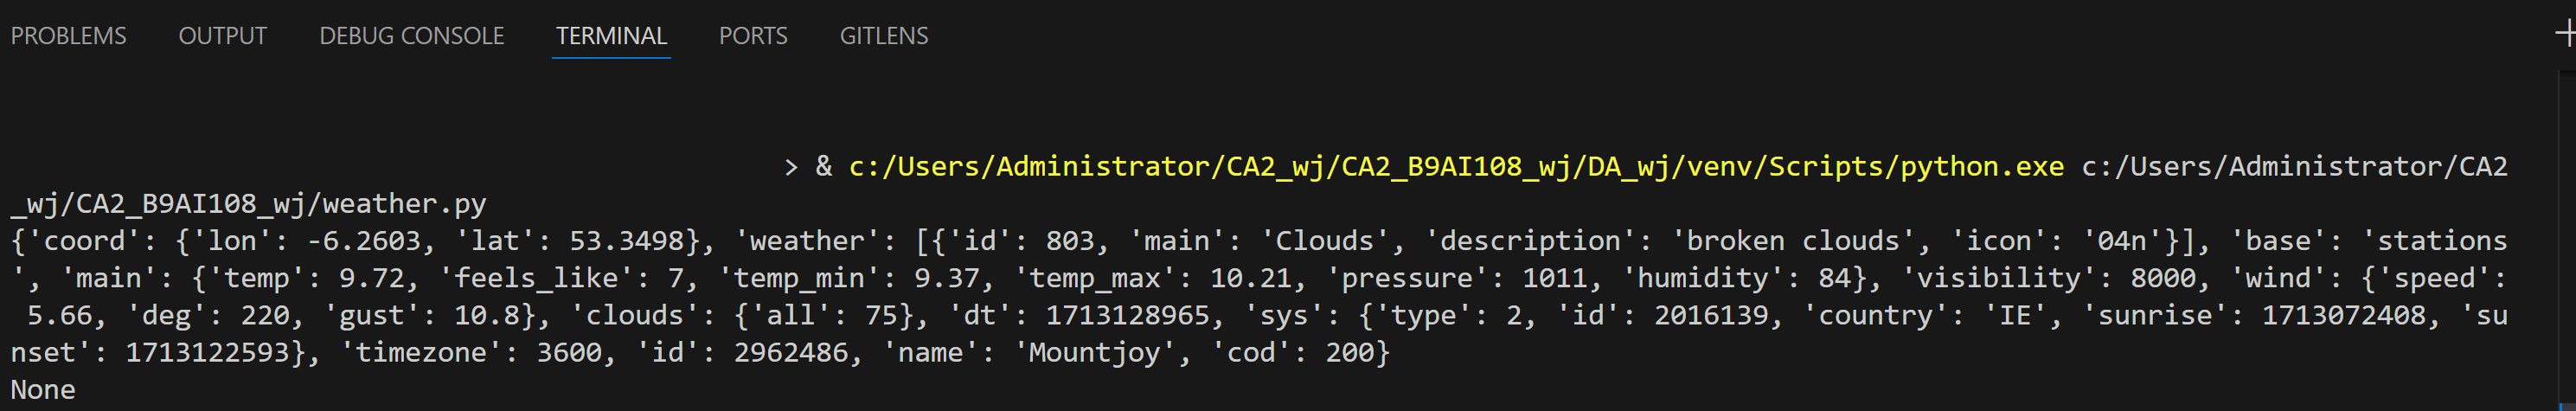

This code installs the citipy package using pip.

In [46]:
import sys
!{sys.executable} -m pip install citipy

I have installed and imported citipy package this will help me output the nearest city to mentioned GEO locations

In [47]:
from citipy import citipy

I have defined the url of OpenWeatherMap and the API that I acquired to fetch the data and also the units that is specified as metric for tempreture

In [48]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ='metric'
api_key= "b201909f617b3bb4e33efe23bade4975"   # URL is defined and the API key is also entered from which we wll fetch the data

We will be fetching and analyzing the data of Ireland and UK

In [49]:
# Latitude and Longitude limits for IRE and UK

#Latitude
lat_min= 50
lat_max=60

#Longitude
lon_min = -10.5
lon_max = 2

Creating an empty list and seting a counter for holding the data

In [50]:


counter = 0
cities=[]

This code will randomly select 80 cities within the latitude and longitude of Ireland and UK. It generates random cordinates and finds the nearest city using citipy library

In [51]:
while counter < 80:    # the counter is set to 80 , so it will iterate through 80 random cities in IRE and UK
  lat = random.uniform(lat_min, lat_max)
  lon = random.uniform(lon_min, lon_max)

  #Finding nearest city to the cordinates
  city =citipy.nearest_city(lat,lon).city_name

  if city not in cities:
    cities.append(city)
    counter += 1
#Ensuring that city is not already in the list

# URL which will run each time during iteration
query_url = f"{url}appid={api_key}&units={units}&q="


Now We will proceed with Fetching Weather Data for Randomly generated cities within our specified Lat Lon values (GEOGRAPHICAL LOCATIONS)

In [52]:
#Setting up Lists to hold response info (For Raw Data)

time_stamp=[]        #Unix Timestamp
city_name= []        # Name of city
lat=[]               #  Latitude
lon=[]                #Longitude
weather_main=[]      # Main weather condition
weather_description=[]    # Description of Weather Condition
icon=[]                   # Weather icon (string)
temperature=[]            # Current Temperature (Float)
min_temperature=[]         # Minimum Temperature (Float)
max_temperature=[]         # Maximum Temperature (Float)
air_pressure=[]             # Atmospheric Pressure (int)
humidity=[]                 # Humidity in Weather (int)
visibility= []              # Visibility (int)
wind_speed=[]               # Wind Speed (Float)
wind_degree=[]              #Wind Degree (int)
country= []                 #Country Code
sunrise= []                 # Sunrise time (Unix Timestamp)
sunset= []                 # Sunset time (Unix Timestamp)

In [53]:
# Writing a for loop to perform iterations through the list of cities and perform a request for data on each

#Appends all the retrieve raw weather data e.g time, city,temp etc to respective lists
#Increment a counter for each successfully processed city/ If an eror occurs during processing, print the error

counter = 0

for city in cities:
  try:
    print(f"checking {city} (city number {counter}) at url {query_url + city}")
    response= requests.get(query_url + city).json()

    time_stamp.append(response['dt'])
    city_name.append(response['name'])
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    weather_main.append(response['weather'][0]['main'])
    weather_description.append(response['weather'][0]['description'])
    icon.append(response['weather'][0]['icon'])
    temperature.append(response['main']['temp'])
    min_temperature.append(response['main']['temp_min'])
    max_temperature.append(response['main']['temp_max'])
    air_pressure.append(response['main']['pressure'])
    humidity.append(response['main']['humidity'])
    visibility.append(response.get('visibility'))
    wind_speed.append(response['wind']['speed'])
    wind_degree.append(response['wind'].get('deg'))
    country.append(response['sys']['country'])
    sunrise.append(response['sys']['sunrise'])
    sunset.append(response['sys']['sunset'])

    counter +=1
  except Exception as e:
    print(f"Error Occured for {city}: {e}")
    pass




checking haverfordwest (city number 0) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=haverfordwest
checking letterkenny (city number 1) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=letterkenny
checking carrigaline (city number 2) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=carrigaline
checking cove (city number 3) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=cove
checking tvoroyri (city number 4) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=tvoroyri
checking buckie (city number 5) at url http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=buckie
checking wick (city number 6) at url http://api.openweathermap.org/data/2.5/weather?

# Code has been tested, the loop is iterating in th URL through API successfully

Now we will fetch the raw data and store it in a csv

In [54]:
# Now we will fetch the raw data and store it in a csv
# Creating a Dict weather_dict_raw which collects and stores all the data that was fetched in the previous code through API

weather_dict_raw = {
    "Time Stamp" : time_stamp,
    "City": city_name,
    "Latitude": lat,
    "Longitude": lon,
    "Weather Main": weather_main,
    "Weather Description": weather_description,
    "Icon": icon,
    "Temperature": temperature,
    "Min Temperature": min_temperature,
    "Max Temperature": max_temperature,
    "Air Pressure": air_pressure,
    "Humidity": humidity,
    "Visibility": visibility,
    "Wind Speed": wind_speed,
    "Wind Degree": wind_degree,
    "Country": country,
    "Sunrise": sunrise,
    "Sunset": sunset
}




Now we will convert the above weather data into a dataframe and then create the CSV file and display the raw data inside that

In [55]:
# Convert the above weather data into data frame

weather_data_raw = pd.DataFrame(weather_dict_raw)

# Create the CSV and display the data in dataframe
weather_data_raw.to_csv('Weather_data_raw.csv', index=False)
weather_data_raw.head()

,Time Stamp,City,Latitude,Longitude,Weather Main,Weather Description,Icon,Temperature,Min Temperature,Max Temperature,Air Pressure,Humidity,Visibility,Wind Speed,Wind Degree,Country,Sunrise,Sunset
0,1713207849,Haverfordwest,51.8017,-4.9691,Clear,clear sky,01d,8.35,6.97,8.77,1002,75,10000,3.13,279,GB,1713158555,1713208597
1,1713207849,Letterkenny,54.9500,-7.7333,Clear,clear sky,01d,9.94,9.94,9.94,1011,84,10000,8.52,318,IE,1713158806,1713209673
2,1713207849,Carrigaline,51.8117,-8.3986,Clouds,broken clouds,04d,8.86,8.86,8.86,1017,66,10000,10.29,310,IE,1713159376,1713209422
3,1713207849,Cové,7.2210,2.3402,Clouds,overcast clouds,04n,30.74,30.74,30.74,1010,60,10000,2.61,162,BJ,1713159714,1713203931
4,1713207695,Tvøroyri,61.5556,-6.8111,Rain,light rain,10d,5.25,5.25,5.25,1008,74,10000,10.99,348,FO,1713157442,1713210595


The above code was created to fetch and store the raw data coming from the URL API. Now we will process this raw data, extract the featured data among this and convert or preprocess the required features and then store it in the csv

In [56]:
# Setting up Lists to hold response info (For Featured Data)

time_stamp = []         # Unix timestamp
city_name = []          # Name of the city
country=[]              # Name of the Country
latitude = []                # Latitude
longitude =[]                 # Longitude
temperature = []        # Current temperature (float)
min_temperature = []    # Minimum temperature (float)
max_temperature = []    # Maximum temperature (float)
sunrise = []            # Unix timestamp
sunset = []             # Unix timestamp
air_pressure = []       # Atmospheric pressure (int)
humidity = []           # Humidity (int)
wind_speed = []         # Wind speed (float)
wind_degree = []        # Wind degree (int)




Now the below code will fetch the data in the boundaries of IRE and UK, itereate through list of cities , queries the OpenWeatherMap API and extract relevant 'selected' features out of it. I have also added a check incase the data is outside the Geographical boundaries

In [57]:
for city in cities:
  try:
    print(f"Checking {city} (city number {counter}) at URL {query_url + city}")
    response = requests.get(query_url + city).json()

    city_lat =response['coord']['lat']
    city_lon =response['coord']['lon']                   # Extract Relevant data from the response

    print (f"City Coordincates: Latitude={city_lat}, Longitude = {city_lon}")

    #Checking id city coordinates are within the specified ranges for Ireland and UK

    if lat_min <= city_lat <= lat_max and lon_min <= city_lon <= lon_max:
      time_stamp.append(response['dt'])
      city_name.append(response['name'])
      country.append(response['sys']['country'])
      latitude.append(city_lat)
      longitude.append(city_lon)
      temperature.append(response['main']['temp'])
      min_temperature.append(response['main']['temp_min'])
      max_temperature.append(response['main']['temp_max'])
      sunrise.append(response['sys']['sunrise'])
      sunset.append(response['sys']['sunset'])
      air_pressure.append(response['main']['pressure'])
      humidity.append(response['main']['humidity'])
      wind_speed.append(response['wind']['speed'])
      wind_degree.append(response['wind']['deg'])

      counter +=1

    else:
      print(f"{city} is outside the latitude and longitude boundaries of Ireland and UK.. Skipping...")

  except Exception as e:
       print(f"Error occured for {city}: {e}")



Checking haverfordwest (city number 76) at URL http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=haverfordwest
City Coordincates: Latitude=51.8017, Longitude = -4.9691
Checking letterkenny (city number 77) at URL http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=letterkenny
City Coordincates: Latitude=54.95, Longitude = -7.7333
Checking carrigaline (city number 78) at URL http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=carrigaline
City Coordincates: Latitude=51.8117, Longitude = -8.3986
Checking cove (city number 79) at URL http://api.openweathermap.org/data/2.5/weather?appid=b201909f617b3bb4e33efe23bade4975&units=metric&q=cove
City Coordincates: Latitude=7.221, Longitude = 2.3402
cove is outside the latitude and longitude boundaries of Ireland and UK.. Skipping...
Checking tvoroyri (city number 79) at URL http://api.openweathermap.o

Here I have created a dictionary called 'weather_dict' using selected weather features. It also converts time stamp into separate data and time and surise and sunset timestamp data is converted into just time

In [58]:
# Using a Dictionary to create a Pandas DataFrame with the data
#Here we will only store our desired/selected features
weather_dict= {
    "Date": pd.to_datetime(time_stamp, unit='s').date,            #TImestamp will be converted into seprate date and time
    "Time": pd.to_datetime(time_stamp, unit='s').time,
    "Country": country,
    "City":city_name,
    "Latitude": latitude,
    "Temperature (℉)": temperature,
    "Min Temperature (℉)": min_temperature,
    "Max Temperature (℉)": max_temperature,
    "Sunrise": pd.to_datetime(sunrise, unit='s').strftime('%H:%M:%S'),       # This pd fn Extracts time part only
    "Sunset": pd.to_datetime(sunset, unit='s').strftime('%H:%M:%S'),      # This pd fn Extracts time part only
    "Air Pressure (hPa)": air_pressure,
    "Humidity (%)": humidity,
    "Wind Speed (m/s)": wind_speed,
    "Wind Degree (°)" : wind_degree
}

In [68]:
#Converting the above data into data frame and printing the initial rows

weather_data= pd.DataFrame(weather_dict)
weather_data.head()

,Date,Time,Country,City,Latitude,Temperature (℉),Min Temperature (℉),Max Temperature (℉),Sunrise,Sunset,Air Pressure (hPa),Humidity (%),Wind Speed (m/s),Wind Degree (°)
0,2024-04-15,19:04:09,GB,Haverfordwest,51.8017,8.35,6.97,8.77,05:22:35,19:16:37,1002,75,3.13,279
1,2024-04-15,19:04:09,IE,Letterkenny,54.9500,9.94,9.94,9.94,05:26:46,19:34:33,1011,84,8.52,318
2,2024-04-15,19:04:09,IE,Carrigaline,51.8117,8.86,8.86,8.86,05:36:16,19:30:22,1017,66,10.29,310
3,2024-04-15,19:01:54,GB,Buckie,57.6757,7.63,7.24,7.88,05:00:46,19:22:23,1001,91,10.52,343
4,2024-04-15,19:04:09,GB,Wick,58.4333,7.03,7.03,7.03,04:59:07,19:25:00,1001,93,5.66,330


Converting tempreture from celcius to Farhenheit with its units displayed

In [69]:
#Converting tempreture from celcius to Farhenheit with its units displayed
weather_data["Temperature (℉)"]= weather_data["Temperature (℉)"]  * 1.8 + 32
weather_data["Min Temperature (℉)"]= weather_data["Min Temperature (℉)"] * 1.8 + 32
weather_data["Max Temperature (℉)"]= weather_data["Max Temperature (℉)"] * 1.8 + 32

Calculating the Day Length using sunset time and sunrise time and displaying it in hours

In [72]:
weather_data['Sunrise']= pd.to_datetime(weather_data['Sunrise'])
weather_data['Sunset']= pd.to_datetime(weather_data['Sunset'])
weather_data['Day_Length (Hrs)']= ((weather_data['Sunset'] - weather_data['Sunrise']).dt.total_seconds() / 3600).astype(int)  #Converting sec to hrs

In [ ]:
def humidity_catagory(humidity):
  if humidity < 30


Displaying the updated Data head

In [73]:
#Now I will be displaying the updated Data head

weather_data.head()

,Date,Time,Country,City,Latitude,Temperature (℉),Min Temperature (℉),Max Temperature (℉),Sunrise,Sunset,Air Pressure (hPa),Humidity (%),Wind Speed (m/s),Wind Degree (°),Day_Length (Hrs)
0,2024-04-15,19:04:09,GB,Haverfordwest,51.8017,47.030,44.546,47.786,2024-04-15 05:22:35,2024-04-15 19:16:37,1002,75,3.13,279,13
1,2024-04-15,19:04:09,IE,Letterkenny,54.9500,49.892,49.892,49.892,2024-04-15 05:26:46,2024-04-15 19:34:33,1011,84,8.52,318,14
2,2024-04-15,19:04:09,IE,Carrigaline,51.8117,47.948,47.948,47.948,2024-04-15 05:36:16,2024-04-15 19:30:22,1017,66,10.29,310,13
3,2024-04-15,19:01:54,GB,Buckie,57.6757,45.734,45.032,46.184,2024-04-15 05:00:46,2024-04-15 19:22:23,1001,91,10.52,343,14
4,2024-04-15,19:04:09,GB,Wick,58.4333,44.654,44.654,44.654,2024-04-15 04:59:07,2024-04-15 19:25:00,1001,93,5.66,330,14


Storing the data into a csv OR Downloading the created modified/featured data in a Csv file

In [63]:
# Storing the data into a csv
weather_data.to_csv('Updated_Weather_data.csv', index= False)